<a href="https://colab.research.google.com/github/JSRV18/Dinosaurio-repository/blob/main/Parcial2Dinosaurio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
# Parcial

#Punto 24 (Tierra plana)

# (a)
import numpy as np
import matplotlib.pyplot as plt
xi,wi = np.polynomial.legendre.leggauss(50)

In [106]:
# (b)
k= -0.12495122165232053
def dg(ϕ,r,x,y,z):
  return (k*z*r)/((x**2 + y**2 + z**2 -2*r*x*np.cos(ϕ) -2*r*y*np.sin(ϕ))+0j)**(3/2)

In [103]:
# (c)
a=0
b=2*np.pi
c=0
R=1

def g(x,y,z):
  sum = 0
  for i in range (len(xi)):
    for j in range (len(xi)):
      tϕ = 0.5*((b-a)*xi[i] + b + a)
      tr = 0.5*((R-c)*xi[j] + R + c)
      sum += 0.25*(b-a)*(R-c)*np.sum(np.sum(wi[i]*wi[j]*dg(tϕ,tr,x,y,z)))

  return sum

In [104]:
# (d)
g(0.,0.,0.2) #Se modificó el valor de K a -0.12495122165232053 para obtener el valor predicho de la gravedad

(-152.59739646274767+0j)

In [96]:
# (e)
def polares(r,θ):
  x=r*np.cos(θ)
  y=r*np.sin(θ)
  return x,y

In [97]:
u=np.linspace(0,2*np.pi,10)

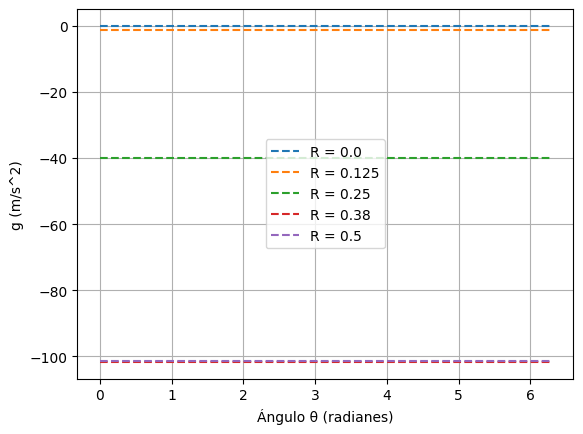

In [107]:
R_values = [0.0, 0.125, 0.25, 0.38, 0.5]

for R in R_values:
    g_values = [g(*polares(R,u), 0.2) for phi in u]
    plt.plot(u, g_values, linestyle="--", label=f"R = {R}")

plt.xlabel('Ángulo θ (radianes)')
plt.ylabel('g (m/s^2)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# En caso de haber obtenido lo sresultados esperados:

In [119]:
""" (f) El punto no se refiere al ángulo de elevación sobre la supericie,
sino al ángulo que se forma en la superficie respecto al eje (θ de las polares).
El hecho de el valor de la gravedad no depende de dicho ángulo implica que
solamente la distancia respecto al centro del disco es el factor determinante
para el valor de la gravedad."""

In [42]:
# (g) Lo intentamos UnU

In [107]:
"""(h) La tierra no puede ser un disco debido a que el valor de la gravedad
varía demadiaso de un lugar a otro en función de la distancia de separación
desde el polo, lo cual no sucede en la realidad."""

In [25]:
# Punto 27
import time

G8=(lambda w0,w1,w2,w3,x0,x1,x2,x3: w0*x0**0 + w1*x1**0 + w2*x2**0 + w3*x3**0 -2, \
    lambda w0,w1,w2,w3,x0,x1,x2,x3: w0*x0**1 + w1*x1**1 + w2*x2**1 + w3*x3**1, \
    lambda w0,w1,w2,w3,x0,x1,x2,x3: w0*x0**2 + w1*x1**2 + w2*x2**2 + w3*x3**2 -2/3, \
    lambda w0,w1,w2,w3,x0,x1,x2,x3: w0*x0**3 + w1*x1**3 + w2*x2**3 + w3*x3**3, \
    lambda w0,w1,w2,w3,x0,x1,x2,x3: w0*x0**4 + w1*x1**4 + w2*x2**4 + w3*x3**4 -2/5, \
    lambda w0,w1,w2,w3,x0,x1,x2,x3: w0*x0**5 + w1*x1**5 + w2*x2**5 + w3*x3**5, \
    lambda w0,w1,w2,w3,x0,x1,x2,x3: w0*x0**6 + w1*x1**6 + w2*x2**6 + w3*x3**6 -2/7,\
    lambda w0,w1,w2,w3,x0,x1,x2,x3: w0*x0**7 + w1*x1**7 + w2*x2**7 + w3*x3**7,)

def GetF(f,r):

  dim = len(f)
  v = np.zeros(dim)

  for i in range(dim):
    v[i] = f[i](r[0],r[1],r[2],r[3],r[4],r[5],r[6],r[7])

  return v

def GetJacobian8(f, r, h=1e-3):
    dim = len(r)
    J = np.zeros((len(f), dim))

    for i in range(len(f)):
        for j in range(dim):
            dr = np.zeros(dim)
            dr[j] = h

            J[i,j] = (f[i](r[0]+dr[0],r[1]+dr[1],r[2]+dr[2],r[3]+dr[3],r[4]+dr[4],r[5]+dr[5],r[6]+dr[6],r[7]+dr[7]) - \
                       f[i](r[0]-dr[0],r[1]-dr[1],r[2]-dr[2],r[3]-dr[3],r[4]-dr[4],r[5]-dr[5],r[6]-dr[6],r[7]-dr[7])) / (2*h)
    return J.T

def GetMetric8(f,r):
  v=GetF(f,r)
  return 0.5*np.linalg.norm(v)**2

def descenso(f, r, lr, epoch, err):


  r=r.astype(np.float64)

  d=1
  it=0
  Vector = np.array([])
  R_vector = np.array(r)

  while d>err and it<epoch:

    Current = GetMetric8(f,r)
    J = GetJacobian8(f,r)
    Gvector = GetF(f,r)

    r-= lr*np.dot(J,Gvector)
    R_vector = np.vstack((R_vector,r))
    New=GetMetric8(f,r)
    Vector=np.append(Vector,New)
    d=abs(Current-New)/New

    if it%500==0:
      time.sleep(0.01)

    it+=1

  return r,it

In [53]:
sol=descenso(G8,np.random.uniform(-1.,1.,size=8),0.01,100000,1e-4)
sol

(array([ 0.35971401,  0.4269118 ,  0.53351212,  0.6797307 , -0.85345493,
         0.83053648, -0.37451455,  0.22351238]),
 13371)

In [54]:
f=lambda x: np.cos(x)
I = np.sum(sol[0][:4] * f(sol[0][4:]))
I

1.6837677168177092

In [107]:
"""La razón de que esta estimación sea poco precisa es que la precisón de los pesos y nodos encontrados
dependen de la tolerancia permitida en el método del descenso, es decir, entre más pequeña sea la tolerancia,
más precisa es la solución encontrada. El problema radica en que la tolerancia no puede ser muy baja ya que
el método colapsa para valores muy pequeños de tolerancia."""